In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

## For the undirected networks karate, lesmis, netscience and dolphins, plot the compute and plot the degree histograms. 

In [3]:
def adjacencyMat(data):
    max_value = int(max(data.max())) 
    max_value +=1
    adMat = np.zeros(shape = (max_value,max_value))
    for k in range(1,len(data)):
        if data.iloc[k,:].isnull().values.any() == True:
            continue
        else:
            adMat[int(data.iloc[k,1]), int(data.iloc[k,0])] += 1
            adMat[int(data.iloc[k,0]), int(data.iloc[k,1])] +=1
    return adMat

In [4]:
def plot_undir_hist(adMat,bins = 12):
    fig, ax = plt.subplots()
    ax.hist(np.sum(adMat,axis =0), bins,density=True)
    ax.set_title(f'Degree Distribution')
    ax.set_xlabel('Degree')
    fig.tight_layout()
    return plt.show()

In [5]:
def plot_undir_degdist(data,bins):
    adMat = adjacencyMat(data)
    plot_undir_hist(adMat,bins)

Karate

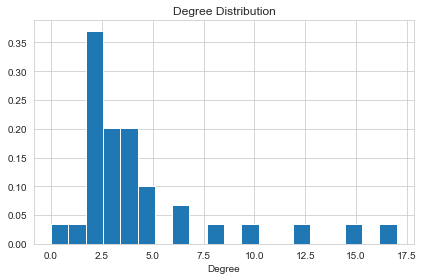

In [12]:
karate = pd.read_csv('./CompAssign1/karate.dat',header= None)
karate.iloc[0,:].shape[0] == 2
plot_undir_degdist(karate,20)

Lesmis

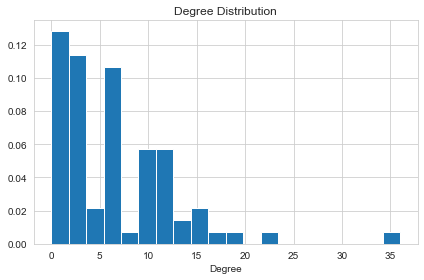

In [13]:
lesmis = pd.read_csv('./CompAssign1/lesmis.dat',header = None)
plot_undir_degdist(lesmis,20)

Netscience

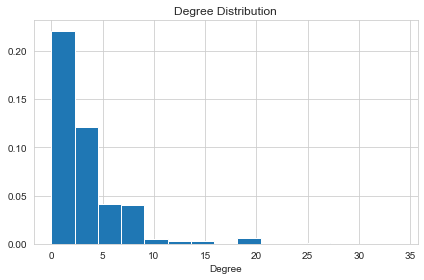

In [14]:
netscience = pd.read_csv('./CompAssign1/netscience.dat',header = None)
plot_undir_degdist(netscience,15)


Dolphins

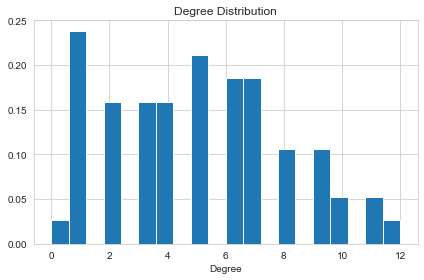

In [15]:
dolphins = pd.read_csv('./CompAssign1/dolphins.dat',header = None)
plot_undir_degdist(dolphins,20)

## For the directed networks celegansneural and pgp-strong-2009, plot the in-degree and out-degree histograms separately.

In [19]:
def plot_dir_degdist(data,bins):
    max_value = int(max(data.max())) 
    max_value +=1
    adMat = np.zeros(shape = (max_value,max_value))
    for k in range(1,len(data)):
        if data.iloc[k,:].isnull().values.any() == True:
            continue
        else:
            adMat[int(data.iloc[k,0]), int(data.iloc[k,1])] += 1
    plot_dir_hist(adMat)

In [20]:
def plot_dir_hist(adMat,bins = 12):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.hist(np.sum(adMat,axis =1), bins,density=True)    
    ax1.set_title('In-Degree Distribution')
    ax1.set_xlabel('In-Degree')
    ax2.hist(np.sum(adMat,axis =0), bins,density=True)    
    ax2.set_title('Out-Degree Distribution for')
    ax2.set_xlabel('Out-Degree')
    fig.tight_layout()
    return plt.show()

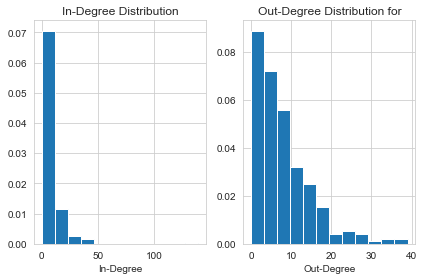

In [21]:
celegansneural = pd.read_csv('./CompAssign1/celegansneural.dat',header = None)
plot_dir_degdist(celegansneural,20)

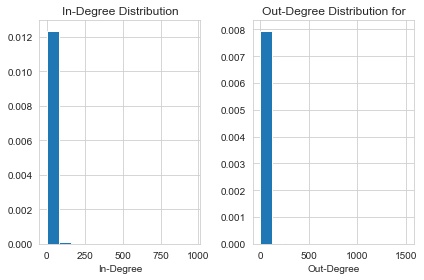

In [103]:
pgp_strong = pd.read_csv('./CompAssign1/pgp-strong-2009.dat',header = None)
plot_dir_degdist(pgp_strong,100)

## For the undirected networks karate, lesmis, netscience and dolphins, compute the global and average clustering coefficients. Also plot the distribution of the local clustering coefficients in each case. 

In [23]:
def GCC(data):
    AdMat = adjacencyMat(data)
    C = 0
    l = AdMat.shape[0]
    for i in range(0,l):
        for j in range(0,l):
            for k in range(1,l):
                mul = AdMat[i,j] * AdMat[j,k] * AdMat[k,i]
                C = C + mul
    k_i = np.sum(AdMat, axis = 0)
    return (C / np.sum(k_i * (k_i - 1)))

In [99]:
def LCC(data): 
    AdMat = adjacencyMat(data)
    C_i = []
    l = AdMat.shape[0]
    s = 0
    for i in range(0,l):
        for j in range(0,l):
            for k in range(1,l):
                mul = AdMat[i,j] * AdMat[j,k] * AdMat[k,i]
            s = s + mul
            C_i.append(s)
    k_i = np.sum(AdMat, axis = 0)
    c_i = (C_i / np.sum(k_i * (k_i - 1)))
    avgci = np.sum(c_i) / l
    return c_i, avgci

In [107]:
def plot_LCC(c_i,bins = 12):
    fig, ax = plt.subplots()
    ax.hist(c_i, bins, range = (0,max(c_i)),density=True)
    ax.set_title('Distribution of the local clustering coefficients')
    ax.set_xlabel('Local Clustering Coefficient of node i')
    fig.tight_layout()
    return plt.show()

In [6]:
karate = pd.read_csv('./CompAssign1/karate.dat',header= None)

Global Clustering Coefflicient : 0.22574257425742575
LCC :.[0.         0.         0.         ... 0.02970297 0.02970297 0.02970297] 
 Average clustering coefficient : 0.21063649222065062


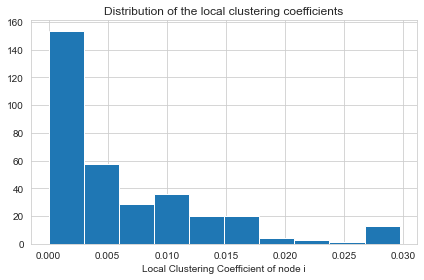

In [108]:
Cg = GCC(karate)
print(f'Global Clustering Coefflicient : {Cg}')
Ci, Ci_avg = LCC(karate)
print(f'LCC :.{Ci} \n',f'Average clustering coefficient : {Ci_avg}')
plot_LCC(Ci,10)

In [109]:
lesmis = pd.read_csv('./CompAssign1/lesmis.dat',header = None)

Global Clustering Coefflicient : .0.5005359056806002
LCC :.[0.         0.         0.         ... 0.00750268 0.00750268 0.00750268] 
 Average clustering coefficient : .0.11516475664385634


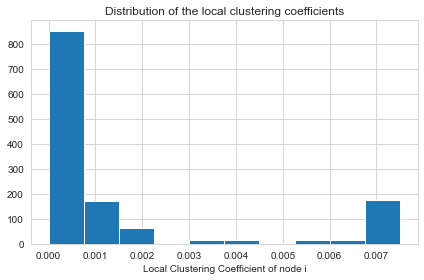

In [110]:
Cg = GCC(lesmis)
print(f'Global Clustering Coefflicient : .{Cg}')
Ci, Ci_avg = LCC(lesmis)
print(f'LCC :.{Ci} \n',f'Average clustering coefficient : .{Ci_avg}')
plot_LCC(Ci,10)

In [111]:
netscience = pd.read_csv('./CompAssign1/netscience.dat',header = None)

In [ ]:
Cg = GCC(netscience)
print(f'Global Clustering Coefflicient : .{Cg}')
Ci, Ci_avg = LCC(netscience)
print(f'LCC :.{Ci} \n',f'Average clustering coefficient : .{Ci_avg}')
plot_LCC(Ci,10)

In [ ]:
dolphins = pd.read_csv('./CompAssign1/dolphins.dat',header = None)

In [ ]:
Cg = GCC(dolphins)
print(f'Global Clustering Coefflicient : .{Cg}')
Ci, Ci_avg = LCC(dolphins)
print(f'LCC :.{Ci} \n',f'Average clustering coefficient : .{Ci_avg}')
plot_LCC(Ci,10)

In [8]:
adm = adjacencyMat(karate)

In [10]:
a = np.matmul(adm,adm)

In [15]:
np.sum(np.diag(a) / np.sum(k*(k-1))) / 34

0.004484566103669191

In [12]:
k = np.sum(adm, axis = 0)